<a href="https://colab.research.google.com/github/Artcaramel/Machinelearning/blob/main/%EC%A3%BC%EC%84%B1%EB%B6%84_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주성분 분석
---

## 핵심 키워드
---
- 차원 축소
- 주성분 분석
- 설명된 분산

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/6-3.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 차원 축소 dimensionality reduction
---
- 데이터가 가진 속성을 특성이라고 부른다면 저번 편의 과일 사진은 1만개의 픽셀이 있기 때문에 1만개의 특성이 있는 셈
- 차원 축소는 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이는 것
- 데이터 크기를 줄이고, 지도학습 모델 성능을 향상시킬 수 있는 방법 
- 차원 축소를 실행할 경우 과대적합을 방지할 수 있음
- 또한 줄어든 차원에서 원본 차원으로 손실을 줄이면서 복원도 가능
- 대표적인 차원축소 알고리즘이 주성분 분석

## 주성분 분석 PCA Principal Component Analysis
---
- 데이터에서 가장 분산이 큰 방향을 찾는 방법
- 이 방향이 주성분 Principal Component
- 주성분 벡터는 원본 데이터에 있는 어떠한 방향적 특성
- 따라서 주성분 벡터의 원소개수는 원본 데이터셋에 있는 특성 개수와 같음
- 주성분은 가장 분산이 큰 방향이기 때문에, 첫 번째 주성분이 분산이 가장 크고, 마지막으로 갈수록 분산이 작아 짐
- 고차원 공간의 표본들을 선형 연관성이 없는 저차원 공간(주성분)의 표본으로 변환하기 위해 직교 변환을 사용
- 주성분은 원본 차원과 같고 그 주성분으로 바꾼 데이터의 차원이 줄어 드는 것임

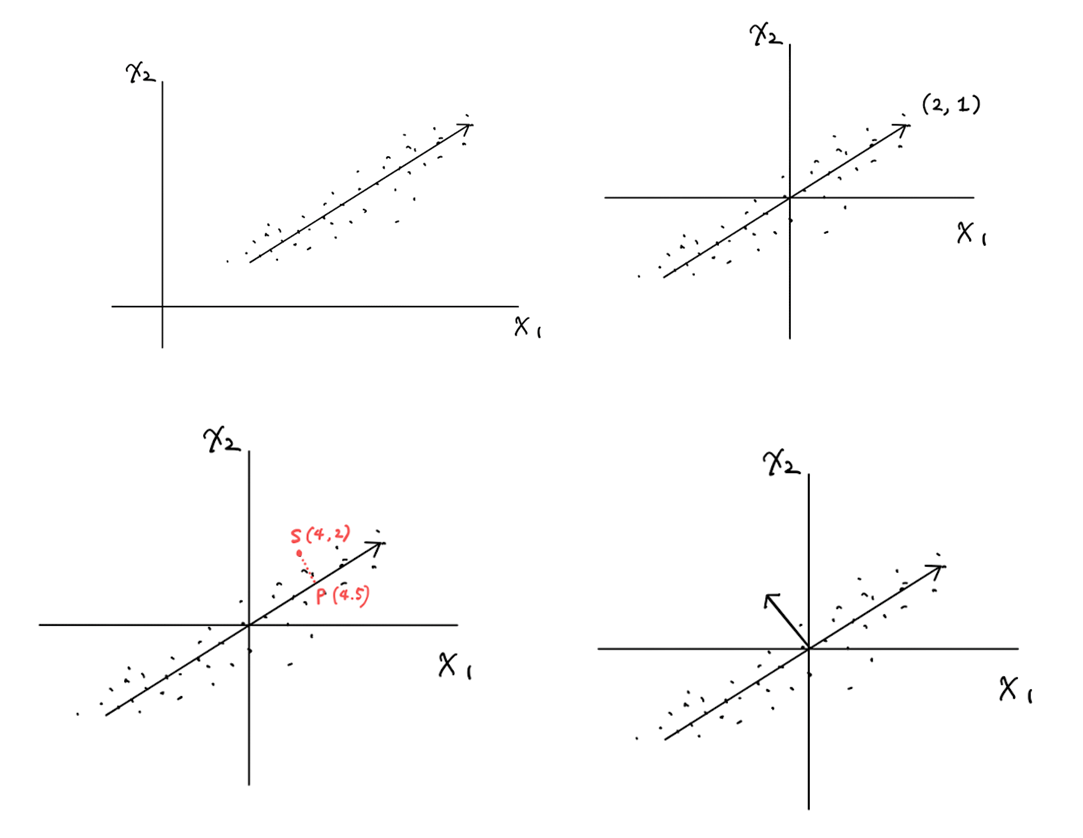

- x1, x2 2개의 특성 2차원 데이터에서 분산이 큰 방향 선택
- 원점으로 이동, 사이킷런 PCA 모델에서 자동 계산됨
- 원본 데이터를 주성분에 투영(직각으로)하여 새로운 특성을 생성, 2차원 => 1차원
- 2차원이므로 2개의 주성분이 있음 

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2022-10-26 02:34:59--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-10-26 02:34:59--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-10-26 02:34:59--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... conne

In [2]:
# 데이터 로드 및 차원 변경
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [3]:
# 사이킷런을 PCA 이용해 수행
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

- n_components 매개변수에 주성분 개수를 지정
- 찾은 주성분은 components_속성에 저장

In [4]:
print(pca.components_.shape)

(50, 10000)


- 50개의 주성분, 데이터의 특성 개수는 10000 원본과 동일

In [5]:
# 그림 그리는 함수
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다. 
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

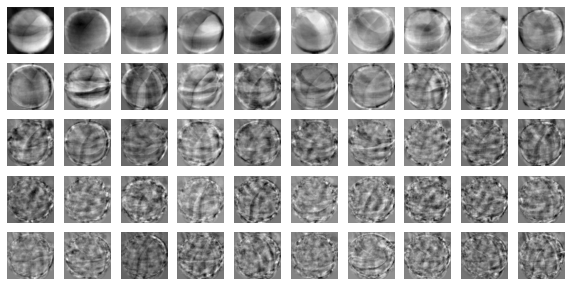

In [6]:
# 주성분 별 분산이 큰 방향 순서 10000개 특성 => 50개 특성
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [ ]:
print(fruits_2d.shape)

(300, 10000)


In [7]:
fruits_pca = pca.transform(fruits_2d)

- fruits_2d는 10000개의 픽셀값을 가지는 300개의 이미지
- 주성분 분석을 이용해 차원을 줄여 (300, 50)크기의 배열로 변환

In [8]:
print(fruits_pca.shape)

(300, 50)


### 원본 데이터 재구성
---
- 축소하는 과정으로인한 손실은 발생
- 하지만 최대한 분산이 큰 방향으로 데이터를 투영했기 때문에 원본 데이터 상당부분을 재구성 가능
- inverse_transform() 메서드를 제공

In [9]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


In [10]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

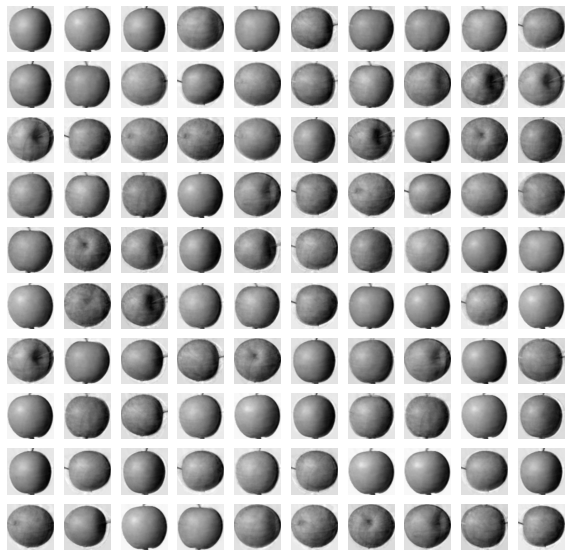

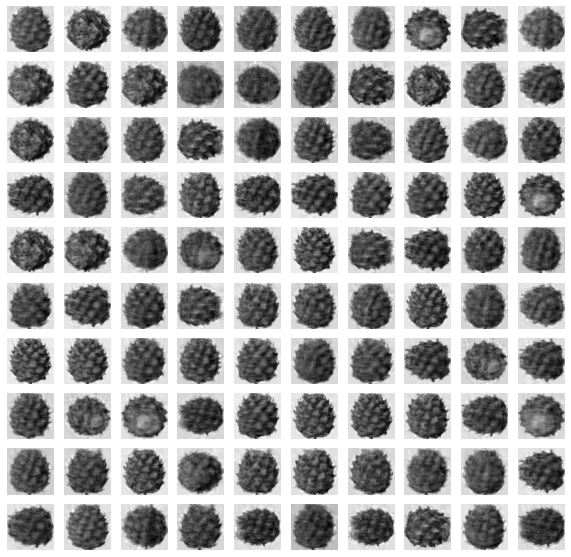

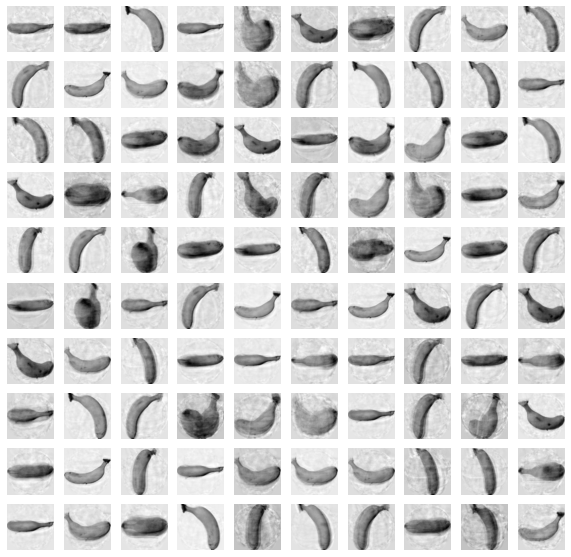

In [11]:
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

- 만약 주성분을 최대로 사용했다면 보다 완벽하게 재구성이 가능했을 것임

## 설명된 분산
---
- 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값
- explained_variance_ratio_에 각 주성분의 설명된 분산 비율이 기록
- 분산비율을 모두 더하면 50개의 주성분으로 표현하고 있는 총 분산 비율 확인 가능
- 분산 비율로 원본 데이터를 얼마나 설명하는 지 알수 있음
- 설명된 분산의 비율을 그래프로 그려보면 적절한 주성분의 개수를 찾는데 도움이 됨

In [12]:
# 분산 비율
print(np.sum(pca.explained_variance_ratio_))

0.9215410440609201


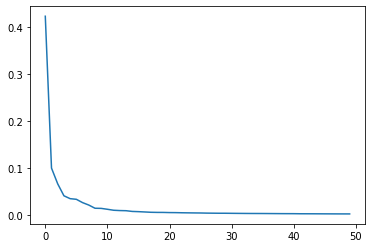

In [13]:
plt.plot(pca.explained_variance_ratio_)

- 그래프를 보면 처음 10개 정도의 주성분이 대부분의 분산을 표현

## 원본 데이터와 PCA로 축소한 데이터를 지도 학습 성능 비교
---
- 3개의 과일 사진을 분류해야 하므로 간단히 로지스틱 회귀 모델을 사용
- 타깃값 사과를 0, 파인애플을 1, 바나나를 2로 지정

In [14]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [15]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [18]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.6040543079376222


- 원본 데이터를 사용 cross_validate()로 교차검증을 수행
- 교차 검증의 점수는 매우 높지만, 특성이 10000개나 되기 때문에 300개의 샘플에서는 금방 과대적합된 모델 되기 쉬움

In [17]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.04576783180236817


- 차원축소된 데이터로 모델을 다시 훈련
- 50개의 특성만 사용했는데도  100%의 정확도와 매우 짧은 훈련시간을 기록

### 원하는 분산 비율로 주성분 찾기
---
- n_components 에 비율 지정

In [19]:
pca = PCA(n_components=0.5)  # 비율 지정(분산 비율)과 정수 지정을 구분(주성분 분석)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [20]:
# 2개의 특성만으로도 원본 데이터에 있는 분산의 50%를 표현
print(pca.n_components_)

2


In [21]:
# 주성분으로 변환
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [22]:
# 교차 검증
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.99
0.04483242034912109


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


- 로지스틱 모델이 완전히 수렴하지 못해 반복 횟수 증가 오류 => 검증 결과가 좋으니 무시

### 축소된 데이터를 이용해 k-평균 알고리즘 적용
---


In [23]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)

KMeans(n_clusters=3, random_state=42)

In [24]:
# 각 클러스터의 샘플의 갯수 확인
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


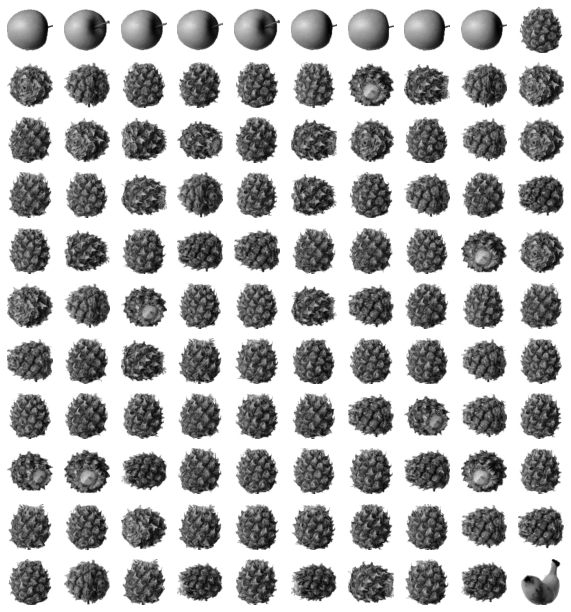

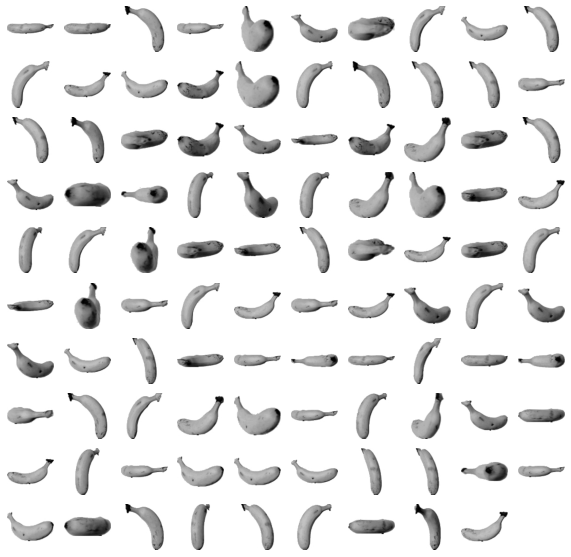

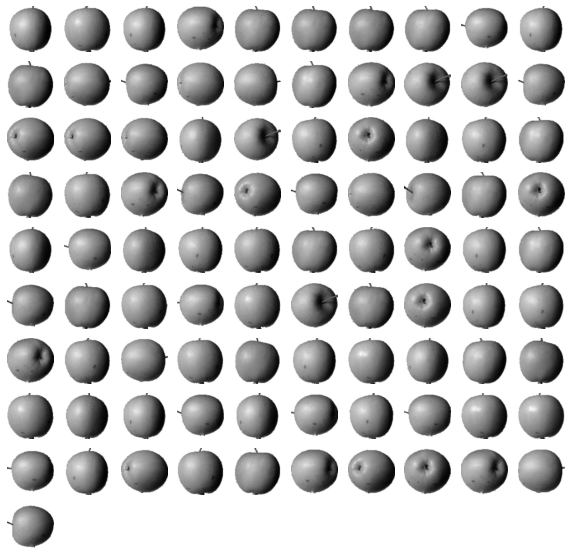

In [25]:
# 시각화
for label in range(0, 3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

### 차원을 줄이면 시각화에 용이
---
- fruits_pca데이터는 2개의 특성이 있기 때문에 2차원으로 표현이 가능


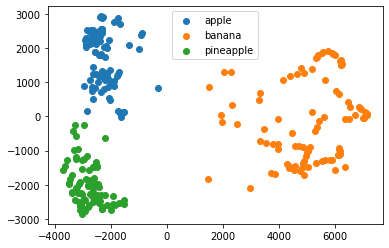

In [ ]:
# km.labels_ 값 산점도 
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()